# HEALTH RISK PREDICTION 

# Import Libraries 

In [140]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder ,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Load Data 

In [141]:
df = pd.read_csv("/kaggle/input/health-risk-prediction-anonymized-real-data/Health_Risk_Dataset.csv")
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


# Data Analysis 

In [142]:
df.shape

(1000, 10)

In [143]:
df.size

10000

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [145]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


In [146]:
df.isnull().sum()

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64

In [147]:
df.duplicated().sum()

0

# Data Preprocessing and Splitting 

In [148]:
df.columns

Index(['Patient_ID', 'Respiratory_Rate', 'Oxygen_Saturation', 'O2_Scale',
       'Systolic_BP', 'Heart_Rate', 'Temperature', 'Consciousness',
       'On_Oxygen', 'Risk_Level'],
      dtype='object')

In [149]:
df.Consciousness.value_counts()

Consciousness
A    914
V     33
U     26
P     20
C      7
Name: count, dtype: int64

In [150]:
from sklearn.preprocessing import LabelEncoder 

In [151]:
enc = LabelEncoder()

In [152]:
df.Consciousness = enc.fit_transform(df.Consciousness)

In [153]:
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,0,0,Medium
1,P0738,28,92,2,116,151,38.5,2,1,High
2,P0741,29,91,1,79,135,38.4,0,0,High
3,P0661,24,96,1,95,92,37.3,0,0,Medium
4,P0412,20,96,1,97,97,37.4,0,0,Low


In [154]:
df.Risk_Level.value_counts()

Risk_Level
Medium    306
High      279
Low       255
Normal    160
Name: count, dtype: int64

In [155]:
ord_enc= OrdinalEncoder()

In [156]:
df["Risk_Level"] = ord_enc.fit_transform(df["Risk_Level"].values.reshape(-1, 1))


In [157]:
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,0,0,2.0
1,P0738,28,92,2,116,151,38.5,2,1,0.0
2,P0741,29,91,1,79,135,38.4,0,0,0.0
3,P0661,24,96,1,95,92,37.3,0,0,2.0
4,P0412,20,96,1,97,97,37.4,0,0,1.0


In [158]:
df.Risk_Level.value_counts()

Risk_Level
2.0    306
0.0    279
1.0    255
3.0    160
Name: count, dtype: int64

In [159]:
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,0,0,2.0
1,P0738,28,92,2,116,151,38.5,2,1,0.0
2,P0741,29,91,1,79,135,38.4,0,0,0.0
3,P0661,24,96,1,95,92,37.3,0,0,2.0
4,P0412,20,96,1,97,97,37.4,0,0,1.0


In [160]:
df = df.drop("Patient_ID",axis=1)

In [161]:
df.head()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,25,96,1,97,107,37.5,0,0,2.0
1,28,92,2,116,151,38.5,2,1,0.0
2,29,91,1,79,135,38.4,0,0,0.0
3,24,96,1,95,92,37.3,0,0,2.0
4,20,96,1,97,97,37.4,0,0,1.0


In [162]:
X = df.drop("Risk_Level",axis=1)
y = df['Risk_Level']

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Implementation 

In [164]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,    # Number of boosting stages
    learning_rate=0.1,   # Shrinks contribution of each tree
    max_depth=5,         # Depth of trees (via max_leaf_nodes/min_samples_leaf)
    random_state=42
)

# Train model
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

Accuracy: 0.965
Precision (macro): 0.9663841807909604
Recall (macro): 0.9640010586811857
F1-score (macro): 0.965063828845071

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        58
         1.0       0.93      0.93      0.93        45
         2.0       0.93      0.96      0.95        57
         3.0       1.00      0.97      0.99        40

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.96      0.97       200



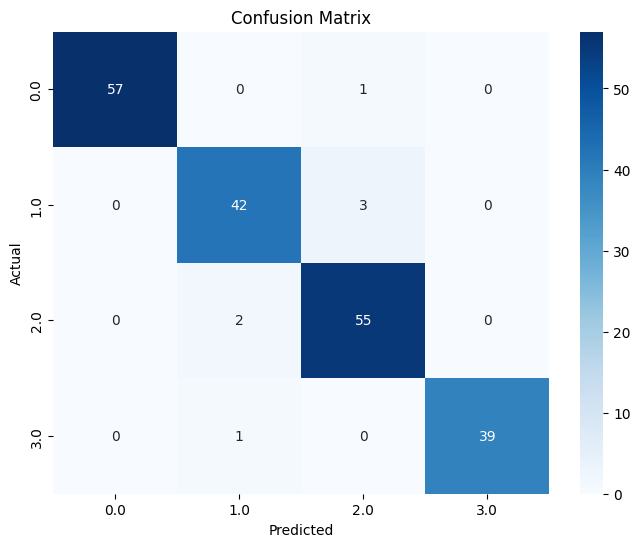

Multi-class ROC-AUC (OvR): 0.9983781790742742


In [167]:
# 1. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Precision, Recall, F1 (macro for multi-class)
print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
print("F1-score (macro):", f1_score(y_test, y_pred, average="macro"))

# 3. Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 5. ROC-AUC (works for binary or multi-class with 'ovr')
try:
    y_proba = gb_model.predict_proba(X_test)  # probabilities
    if len(np.unique(y_test)) == 2:  # binary classification
        auc = roc_auc_score(y_test, y_proba[:,1])
        print("ROC-AUC:", auc)

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
        plt.plot([0,1], [0,1], linestyle="--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

    else:  # multi-class classification
        auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
        print("Multi-class ROC-AUC (OvR):", auc)

except Exception as e:
    print("ROC-AUC not available:", e)